# **Project: `Google Stock Price Prediction`**

**Dataset**: `Google_Stock_Price_Test.csv, Google_Stock_Price_Train.csv

- **Google** is a well-known multinational technology company recognized for its ***popular search engine***, advertising platform, and a wide range of internet-related products and services.
- The company is publicly traded on the ***NASDAQ stock exchange***, and it has two primary classes of shares: ***Class A shares*** (ticker symbol "`GOOGL`") and ***Class C shares*** (ticker symbol "`GOOG`").
- **NASDAQ** : ***NASDAQ*** stands for the National Association of Securities Dealers Automated Quotations, which is an ***American stock exchange*** based in New York City.

## **Importing required packages and libraries**

- `numpy` (Numerical Python) and `pandas` are two popular Python libraries used for data manipulation, analysis, and computation in scientific and data-intensive applications.
- `matplotlib` is a plotting library used to create charts and visualizations.

In [1]:
!pip install seaborn
# Importing the libraries for operation
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## **Importing dataset**
- Dataset can be from multiple sources and we can do ETL (Extract-Transform-Load) to collect the data from different datasets.
- We have 2 dataset one for training the model and another for testing.

In [2]:
# Importing google stock price dataset
googleDatasetTraining = pd.read_csv('./Google_Stock_Price_Train.csv')
googleDatasetTraining.head(3)

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"


## **EDA - Exploratory Data Analysis**

- Data exploring: head, tail, sample, shape, info, describe, unique.

- Data retriveing: groupby, loc, iloc, sort_values.

- Data operations: agg, max, min, transform, apply, drop, drop_duplicate, not_null, mean.

- Data Validation: Missing values and NA: isna, dropna, fillna.

- plotting

Take judgements and predictions by analyzing the data.

### **Data Exploring**

In [3]:
print(googleDatasetTraining.head(3))
print(googleDatasetTraining.tail(3))
print(googleDatasetTraining.sample(n=3))

       Date    Open    High     Low   Close     Volume
0  1/3/2012  325.25  332.83  324.97  663.59  7,380,500
1  1/4/2012  331.27  333.87  329.08  666.45  5,749,400
2  1/5/2012  329.83  330.75  326.89  657.21  6,590,300
            Date    Open    High     Low   Close     Volume
1255  12/28/2016  793.70  794.23  783.20  785.05  1,153,800
1256  12/29/2016  783.33  785.93  778.92  782.79    744,300
1257  12/30/2016  782.75  782.78  770.41  771.82  1,770,000
           Date    Open    High     Low   Close     Volume
771   1/28/2015  521.35  521.56  508.60   508.6  1,683,800
1028   2/4/2016  722.81  727.00  701.86  708.01  5,168,700
939   9/28/2015  610.34  614.60  589.38  594.89  3,127,700


- After going through the data head, tail and sample, I infer that:
  - Date is in form of mm/dd/yyyy
  - Open, High, Low, Close are float values
  - Volume should be an string or object due to numbers with ','

In [4]:
googleDatasetTraining.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


- After going through the info of the dataset, I infer that:
  - All the fields and no null values.
  - There are 1258 entries, all 6 column non-null.
  - Date is of type object, no changes for now.
  - Close is of type object but we infered it to be float, operation to perform.
  - Volume is of object type, I consider it to be changed to number(long).

- First going over `Close` which is of type object to make it float
- After going over the field found that it contains a value as 1,008.64. First making a fix for that.

In [5]:
print(googleDatasetTraining['Close'].unique())
googleDatasetTraining['Close'] = googleDatasetTraining['Close'].str.replace(',','')
googleDatasetTraining['Close'] = googleDatasetTraining['Close'].astype(float)
print(googleDatasetTraining['Close'].unique())

['663.59' '666.45' '657.21' ... '785.05' '782.79' '771.82']
[663.59 666.45 657.21 ... 785.05 782.79 771.82]


- Fixed `Close` now going over `Volume` which shows almost the same issue of being an object with `,` in between number that is to be convert to int

In [6]:
print(googleDatasetTraining['Volume'].unique())
googleDatasetTraining['Volume'] = googleDatasetTraining['Volume'].str.replace(',','')
googleDatasetTraining['Volume'] = googleDatasetTraining['Volume'].astype(int)
print(googleDatasetTraining['Volume'].unique())

['7,380,500' '5,749,400' '6,590,300' ... '1,153,800' '744,300' '1,770,000']
[7380500 5749400 6590300 ... 1153800  744300 1770000]


In [7]:
# setting display format for describe.
pd.set_option('display.float_format', '{:.2f}'.format)
googleDatasetTraining.describe()

,Open,High,Low,Close,Volume
count,1258.00,1258.00,1258.00,1258.00,1258.00
mean,533.71,537.88,529.01,712.67,3158106.76
std,151.90,153.01,150.55,164.75,2273725.58
min,279.12,281.21,277.22,491.20,7900.00
25%,404.12,406.76,401.76,576.74,1621700.00
50%,537.47,540.75,532.99,695.67,2566150.00
75%,654.92,662.59,644.80,782.11,4122500.00
max,816.68,816.68,805.14,1216.83,24977900.00


In [8]:
# getting all the unique values for all fields, to check for continuity of data
googleOpenUnique = googleDatasetTraining['Open'].unique()
googleHighUnique = googleDatasetTraining['High'].unique()
googleLowUnique = googleDatasetTraining['Low'].unique()
googleCloseUnique = googleDatasetTraining['Close'].unique()
googleVolumeUnique = googleDatasetTraining['Volume'].unique()

print(googleOpenUnique, len(googleOpenUnique))
print(googleHighUnique, len(googleHighUnique))
print(googleLowUnique, len(googleLowUnique))
print(googleCloseUnique, len(googleCloseUnique))
print(googleVolumeUnique, len(googleVolumeUnique))
# Almost all values are unique

[325.25 331.27 329.83 ... 793.7  783.33 782.75] 1215
[332.83 333.87 330.75 ... 794.23 785.93 782.78] 1219
[324.97 329.08 326.89 ... 783.2  778.92 770.41] 1223
[663.59 666.45 657.21 ... 785.05 782.79 771.82] 1241
[7380500 5749400 6590300 ... 1153800  744300 1770000] 1240


### **Data Retrieving**

As most of the values are unique, no good will come from grouping the dataset field.

We will sort values based on different fields and comment on outcome.

In [9]:
sortedByOpen = googleDatasetTraining.sort_values(by='Open')
sortedByHigh = googleDatasetTraining.sort_values(by='High')
sortedByLow = googleDatasetTraining.sort_values(by='Low')
sortedByClose = googleDatasetTraining.sort_values(by='Close')
sortedByVolume = googleDatasetTraining.sort_values(by='Volume')

In [10]:
sortedByOpen

,Date,Open,High,Low,Close,Volume
114,6/15/2012,279.12,281.21,277.50,562.96,6024800
113,6/14/2012,279.60,281.48,277.22,557.52,4707200
112,6/13/2012,279.81,282.44,278.30,559.55,3923000
115,6/18/2012,280.26,286.03,278.58,569.29,5012400
121,6/26/2012,280.33,282.24,278.70,563.13,2710500
...,...,...,...,...,...,...
1208,10/20/2016,803.30,803.97,796.03,796.97,1757500
1210,10/24/2016,804.90,815.18,804.82,813.11,1697500
1212,10/26/2016,806.34,806.98,796.32,799.07,1647700
1214,10/28/2016,808.35,815.49,793.59,795.37,4269900


Infering:

- Lowest open was on 15/06/2012 with 279.12
- Highest open was on 25/10/2016 with 816.68
- In 1593 days, difference 537.56

In [11]:
sortedByHigh

,Date,Open,High,Low,Close,Volume
114,6/15/2012,279.12,281.21,277.50,562.96,6024800
113,6/14/2012,279.60,281.48,277.22,557.52,4707200
123,6/28/2012,281.89,282.06,277.56,562.76,3856100
121,6/26/2012,280.33,282.24,278.70,563.13,2710500
112,6/13/2012,279.81,282.44,278.30,559.55,3923000
...,...,...,...,...,...,...
1207,10/19/2016,798.24,804.60,798.03,801.50,1766800
1212,10/26/2016,806.34,806.98,796.32,799.07,1647700
1210,10/24/2016,804.90,815.18,804.82,813.11,1697500
1214,10/28/2016,808.35,815.49,793.59,795.37,4269900


In [12]:
sortedByLow

,Date,Open,High,Low,Close,Volume
113,6/14/2012,279.60,281.48,277.22,557.52,4707200
114,6/15/2012,279.12,281.21,277.50,562.96,6024800
123,6/28/2012,281.89,282.06,277.56,562.76,3856100
120,6/25/2012,282.61,282.98,277.63,559.16,3174900
111,6/12/2012,283.82,284.09,278.25,563.55,6472500
...,...,...,...,...,...,...
1208,10/20/2016,803.30,803.97,796.03,796.97,1757500
1212,10/26/2016,806.34,806.98,796.32,799.07,1647700
1207,10/19/2016,798.24,804.60,798.03,801.50,1766800
1210,10/24/2016,804.90,815.18,804.82,813.11,1697500


In [13]:
sortedByClose

,Date,Open,High,Low,Close,Volume
760,1/12/2015,493.58,494.62,486.23,491.20,2326700
743,12/16/2014,510.16,511.65,487.66,494.03,3964200
759,1/9/2015,503.38,503.54,493.44,494.81,2071300
761,1/13/2015,497.47,501.60,491.04,494.82,2370400
762,1/14/2015,493.30,501.85,491.65,499.50,2215500
...,...,...,...,...,...,...
544,3/5/2014,605.26,609.26,603.44,1214.92,2479700
540,2/27/2014,606.92,609.83,606.23,1215.87,2529400
545,3/6/2014,608.86,610.79,607.02,1216.27,2545600
538,2/25/2014,605.70,609.96,602.95,1216.66,2888100


In [14]:
sortedByVolume

,Date,Open,High,Low,Close,Volume
563,4/1/2014,557.18,566.89,557.18,565.61,7900
562,3/31/2014,565.34,565.45,555.41,555.45,10800
560,3/27/2014,566.44,566.44,551.41,556.93,13100
561,3/28/2014,559.66,564.88,557.14,558.46,41200
564,4/2/2014,598.35,603.17,560.65,565.45,147100
...,...,...,...,...,...,...
70,4/13/2012,322.57,323.28,310.61,622.89,16379700
12,1/20/2012,294.16,294.40,289.76,584.39,21231800
202,10/19/2012,351.47,352.03,334.75,679.92,23050400
451,10/18/2013,486.47,505.83,485.18,1008.64,23219400


### **Data Operation**

In [15]:
columns = ['Open','High','Low','Close','Volume']
print("Column:\t\t Min \t\t\t Max \t\t\t Mean")
for column in columns:
  print(column,"\t\t",googleDatasetTraining[column].min(),'\t\t',googleDatasetTraining[column].max(),'\t\t',googleDatasetTraining[column].mean())

Column:		 Min 			 Max 			 Mean
Open 		 279.12 		 816.68 		 533.7098330683625
High 		 281.21 		 816.68 		 537.8802225755168
Low 		 277.22 		 805.14 		 529.0074085850557
Close 		 491.2 		 1216.83 		 712.6696661367249
Volume 		 7900 		 24977900 		 3158106.756756757


In [16]:
highestClose = googleDatasetTraining[googleDatasetTraining['Close']==googleDatasetTraining['Close'].max()]
print(highestClose)

          Date   Open   High    Low   Close   Volume
539  2/26/2014 609.71 612.15 604.61 1216.83  3979100


- Above data seems fishy, how can the stock close on 1216.83 while the high was 612.15

In [17]:
higherClose = googleDatasetTraining[googleDatasetTraining['Close']>googleDatasetTraining['High'].max()]
print(higherClose)

          Date   Open   High    Low   Close   Volume
291   3/4/2013 401.15 409.88 401.00  819.25  5571900
292   3/5/2013 412.92 418.51 412.90  836.30  8118400
293   3/6/2013 418.94 420.42 412.86  829.10  5767400
294   3/7/2013 415.47 416.75 413.24  830.32  4120700
295   3/8/2013 415.69 415.90 410.98  829.24  5845600
..         ...    ...    ...    ...     ...      ...
555  3/20/2014 597.73 602.55 595.45 1193.88  3381900
556  3/21/2014 600.90 602.56 589.02 1179.80  6441000
557  3/24/2014 589.88 590.24 570.84 1154.76  6096800
558  3/25/2014 580.82 582.74 571.36 1155.55  4838400
559  3/26/2014 578.84 583.60 563.64 1128.87  5179200

[239 rows x 6 columns]


- After looking looking over the dataset, it's documentation and common terms of stock market, I found Close out the places.
- So I have decided to not use the column

In [18]:
googleDatasetTraining = googleDatasetTraining.drop('Close', axis=1)
googleDatasetTraining.head(3)

,Date,Open,High,Low,Volume
0,1/3/2012,325.25,332.83,324.97,7380500
1,1/4/2012,331.27,333.87,329.08,5749400
2,1/5/2012,329.83,330.75,326.89,6590300


### **Data Validation**

- Checking null values, empty values, and normalizing data

- Checking outliers and extremes
  
  - Outliers are data points that deviate significantly from the rest of the dataset.They are observations that fall far outside the range of typical values or exhibit unusual behavior.
  - Extremes refer to the values that are at the tails of a data distribution, either at the lower or upper end Extremes represent the most extreme values within the dataset but may not necessarily be considered outliers.

In [19]:
googleDatasetTraining.isna().sum()

Date      0
Open      0
High      0
Low       0
Volume    0
dtype: int64

In [20]:
columns = ['Open','High','Low','Volume']
for column in columns:
  print(column,len(googleDatasetTraining[googleDatasetTraining[column]<=0]))

Open 0
High 0
Low 0
Volume 0


In [21]:
invalidData = googleDatasetTraining[googleDatasetTraining['High']<googleDatasetTraining['Low']]
print(invalidData)

Empty DataFrame
Columns: [Date, Open, High, Low, Volume]
Index: []


- Checking for outlier and extremes
- Calculating IQR inter quartile range
  - Four ranges [0-25),[25-50),[50-75),[75-100]
  - IQR = Q3-Q1
  - Datapoint below Q1 - 1.5 * IQR or above Q3 - 1.5 * IQR are outliers

In [22]:
columns = ['Open','High','Low','Volume']

for column in columns:
  print(column)

  Q1 = googleDatasetTraining[column].quantile(0.25)
  Q3 = googleDatasetTraining[column].quantile(0.75)

  IQR = Q3-Q1

  print('Q1:',Q1,"\tQ3:",Q3,"\tIQR:",IQR)

  # multiplier changed from default 1.5 to 0.5 for better accurate data point coverage
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  print("lower:",lower_bound,"\tupper:",upper_bound)

  outliers = googleDatasetTraining[column].loc[(googleDatasetTraining[column] < lower_bound) | (googleDatasetTraining[column] > upper_bound)]

  print(len(outliers))

  # taking records between of the range

  validGoogleDatasetTraining = googleDatasetTraining.loc[(googleDatasetTraining[column] >= lower_bound) & (googleDatasetTraining[column] <= upper_bound)]

  if(column == 'Open'):
    OpenFields = googleDatasetTraining.loc[(googleDatasetTraining['Open'] >= lower_bound) & (googleDatasetTraining['Open'] <= upper_bound)]

  print(len(validGoogleDatasetTraining))

  print("------------------------------------------")


print(OpenFields)

Open
Q1: 404.115 	Q3: 654.9225 	IQR: 250.8075
lower: 27.903750000000002 	upper: 1031.13375
0
1258
------------------------------------------
High
Q1: 406.765 	Q3: 662.5875 	IQR: 255.8225
lower: 23.03125 	upper: 1046.32125
0
1258
------------------------------------------
Low
Q1: 401.765 	Q3: 644.8 	IQR: 243.03499999999997
lower: 37.212500000000034 	upper: 1009.3525
0
1258
------------------------------------------
Volume
Q1: 1621700.0 	Q3: 4122500.0 	IQR: 2500800.0
lower: -2129500.0 	upper: 7873700.0
34
1224
------------------------------------------
            Date   Open   High    Low    Volume
0       1/3/2012 325.25 332.83 324.97   7380500
1       1/4/2012 331.27 333.87 329.08   5749400
2       1/5/2012 329.83 330.75 326.89   6590300
3       1/6/2012 328.34 328.77 323.68   5405900
4       1/9/2012 322.04 322.29 309.46  11688800
...          ...    ...    ...    ...       ...
1253  12/23/2016 790.90 792.74 787.28    623400
1254  12/27/2016 790.68 797.86 787.66    789100
1255  12/28

- Due to small dataset and less outliers itself, we keep the dataset as it is.

### **Visualization**

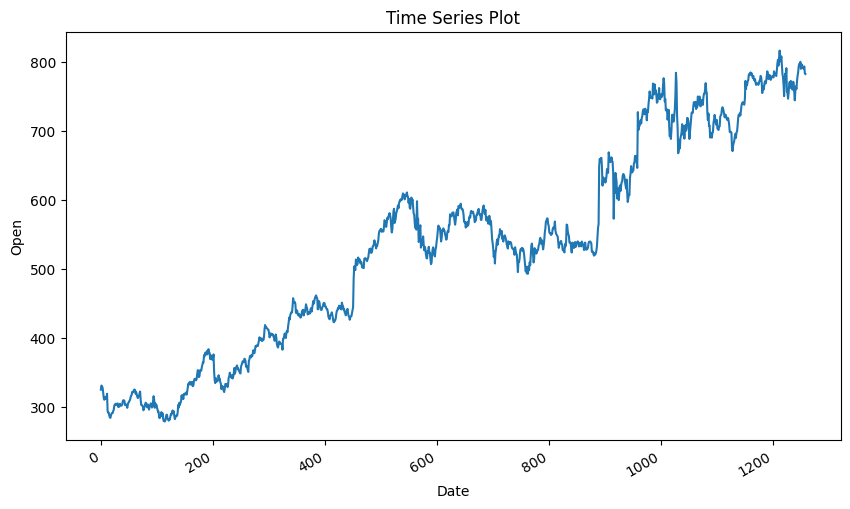

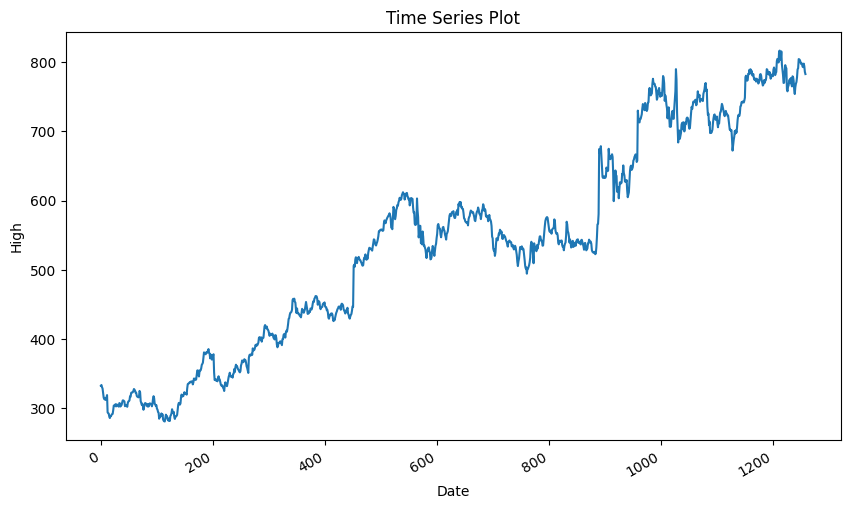

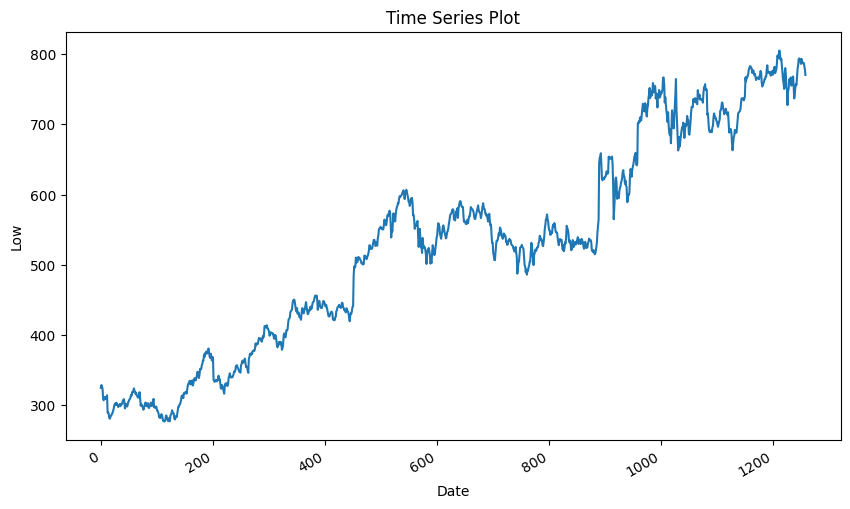

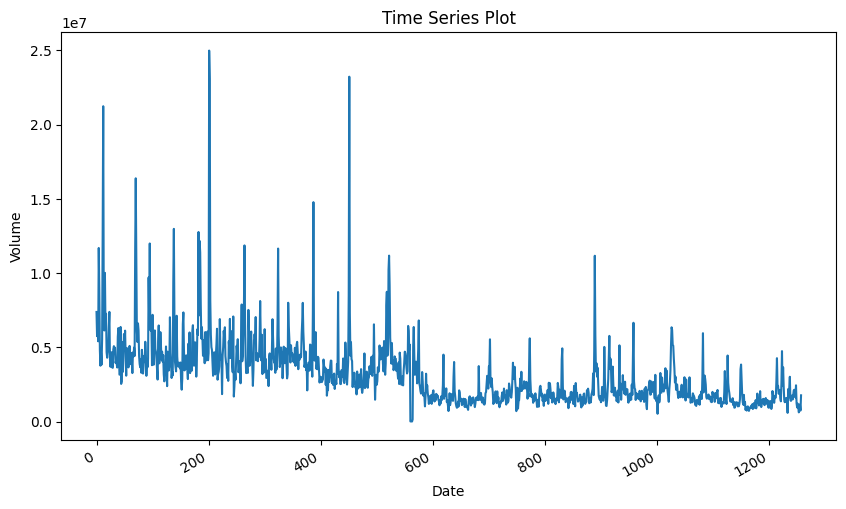

In [23]:
columns = ['Open','High','Low','Volume']

for column in columns:

  # Create the figure and axis objects
  fig, ax = plt.subplots(figsize=(10, 6))

  # Plot the time series data
  ax.plot(googleDatasetTraining.index, googleDatasetTraining[column])

  # Customize the plot
  ax.set_xlabel('Date')
  ax.set_ylabel(column)
  ax.set_title('Time Series Plot')

  # Rotate x-axis labels if needed
  fig.autofmt_xdate()

  # Display the plot
  plt.show()

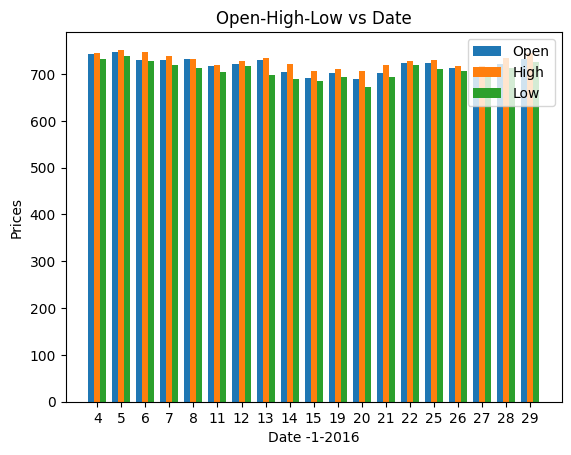

In [24]:
year = 2016
month = 1

# Set the width of the bars
bar_width = 0.25

googleDatasetTraining['Date'] =pd.to_datetime(googleDatasetTraining['Date'])

rangeGoogleDatasetTraining = googleDatasetTraining.loc[((googleDatasetTraining['Date'].dt.year==year) & (googleDatasetTraining['Date'].dt.month==month))]


# Calculate the position of the bars
x = np.arange(len(rangeGoogleDatasetTraining))
x1 = x - bar_width
x2 = x
x3 = x + bar_width

# Create the bar chart
plt.bar(x1, rangeGoogleDatasetTraining['Open'], width=bar_width, label='Open')
plt.bar(x2, rangeGoogleDatasetTraining['High'], width=bar_width, label='High')
plt.bar(x3, rangeGoogleDatasetTraining['Low'], width=bar_width, label='Low')


# Customize the chart
plt.xlabel(f"Date -{month}-{year}")
plt.ylabel('Prices')
plt.title('Open-High-Low vs Date')
plt.xticks(x, rangeGoogleDatasetTraining['Date'].dt.day)
plt.legend()

# Display the chart
plt.show()


<ipython-input-25-2adb4ea3030f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(OpenFields['Open'], kde=True)


<Axes: xlabel='Open', ylabel='Density'>

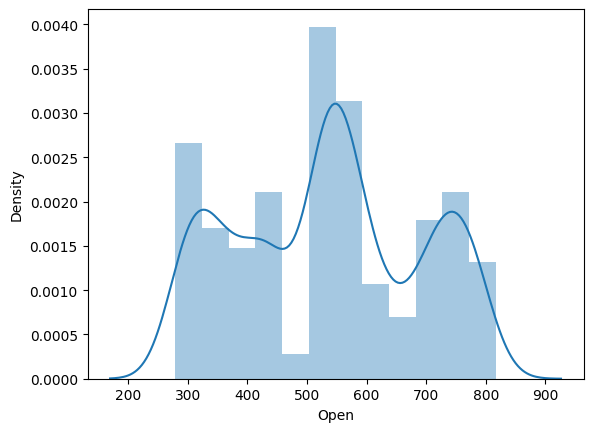

In [25]:
import seaborn as sns
sns.distplot(OpenFields['Open'], kde=True)

<ipython-input-26-b26b457e25f3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(OpenFields['High'], kde=True)


<Axes: xlabel='High', ylabel='Density'>

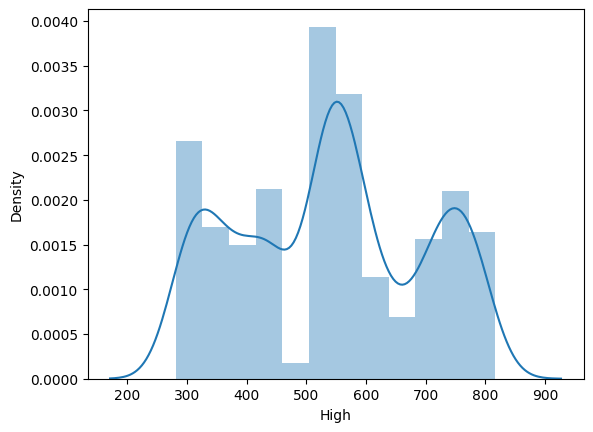

In [26]:
sns.distplot(OpenFields['High'], kde=True)

<ipython-input-27-84899d6bb1e5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(OpenFields['Low'], kde=True)


<Axes: xlabel='Low', ylabel='Density'>

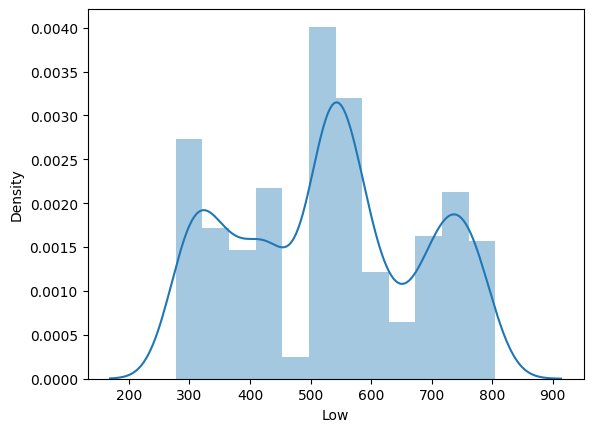

In [27]:
sns.distplot(OpenFields['Low'], kde=True)

<ipython-input-28-63059a960eaf>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(OpenFields['Volume'], kde=True)


<Axes: xlabel='Volume', ylabel='Density'>

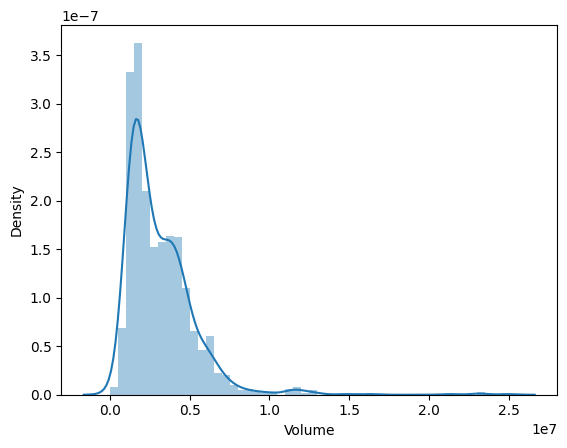

In [28]:
sns.distplot(OpenFields['Volume'], kde=True)

## **Modeling**

- First gathering all the training and testing data.
- Performing the EDA(Data cleaning, Data analysis, feature engineering, etc) steps on it.
- Choosing and fitting the model.
- Evaluating and validating model using testing data.
- Deploy the model and make predictions.

### **Train-Test Dataset gathering**

In [29]:
print(googleDatasetTraining.head(3))
googleDatasetTesting = pd.read_csv("./Google_Stock_Price_Train.csv")
print(googleDatasetTesting.head(3))

        Date   Open   High    Low   Volume
0 2012-01-03 325.25 332.83 324.97  7380500
1 2012-01-04 331.27 333.87 329.08  5749400
2 2012-01-05 329.83 330.75 326.89  6590300
       Date   Open   High    Low   Close     Volume
0  1/3/2012 325.25 332.83 324.97  663.59  7,380,500
1  1/4/2012 331.27 333.87 329.08  666.45  5,749,400
2  1/5/2012 329.83 330.75 326.89  657.21  6,590,300


- Here I need to perform data clearning on testing data, I will follow the same steps that we did for training data.
- I will perform feature engineering on both - I will create a feild called return, which is basically the return percentage of that particular day.

In [30]:
googleDatasetTesting['Date'] =pd.to_datetime(googleDatasetTesting['Date'])
googleDatasetTesting.head(3)

,Date,Open,High,Low,Close,Volume
0,2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
1,2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2,2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"


In [31]:
googleDatasetTesting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1258 non-null   datetime64[ns]
 1   Open    1258 non-null   float64       
 2   High    1258 non-null   float64       
 3   Low     1258 non-null   float64       
 4   Close   1258 non-null   object        
 5   Volume  1258 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 59.1+ KB


- Need to convert Close to float nad Volume to int64
- But we already have did data analysis on training data and removed Close dues to insignificant data points.
- We can change volume to int64

In [32]:
googleDatasetTesting = googleDatasetTesting.drop("Close", axis=1)

In [33]:
print(googleDatasetTesting['Volume'].unique())
googleDatasetTesting['Volume'] = googleDatasetTesting['Volume'].str.replace(',','')
googleDatasetTesting['Volume'] = googleDatasetTesting['Volume'].astype(int)
print(googleDatasetTesting['Volume'].unique())
print(googleDatasetTesting)

['7,380,500' '5,749,400' '6,590,300' ... '1,153,800' '744,300' '1,770,000']
[7380500 5749400 6590300 ... 1153800  744300 1770000]
           Date   Open   High    Low    Volume
0    2012-01-03 325.25 332.83 324.97   7380500
1    2012-01-04 331.27 333.87 329.08   5749400
2    2012-01-05 329.83 330.75 326.89   6590300
3    2012-01-06 328.34 328.77 323.68   5405900
4    2012-01-09 322.04 322.29 309.46  11688800
...         ...    ...    ...    ...       ...
1253 2016-12-23 790.90 792.74 787.28    623400
1254 2016-12-27 790.68 797.86 787.66    789100
1255 2016-12-28 793.70 794.23 783.20   1153800
1256 2016-12-29 783.33 785.93 778.92    744300
1257 2016-12-30 782.75 782.78 770.41   1770000

[1258 rows x 5 columns]


In [34]:
googleDatasetTesting.describe()

,Open,High,Low,Volume
count,1258.00,1258.00,1258.00,1258.00
mean,533.71,537.88,529.01,3158106.76
std,151.90,153.01,150.55,2273725.58
min,279.12,281.21,277.22,7900.00
25%,404.12,406.76,401.76,1621700.00
50%,537.47,540.75,532.99,2566150.00
75%,654.92,662.59,644.80,4122500.00
max,816.68,816.68,805.14,24977900.00


- Our target will be High field as dependent variable, while we do correlation with other continuous fields as independent variable.
- Considering regression models for prediction

In [35]:
googleDatasetTraining.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1258 non-null   datetime64[ns]
 1   Open    1258 non-null   float64       
 2   High    1258 non-null   float64       
 3   Low     1258 non-null   float64       
 4   Volume  1258 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 49.3 KB


### **Feature Selection**

In [36]:
independentVariables = ['Open','Low','Volume']
dependentVariable = 'High'
for variable in independentVariables:
  print(f"correlation between {dependentVariable}-{variable}")
  print(googleDatasetTraining[dependentVariable].corr(googleDatasetTraining[variable]))

correlation between High-Open
0.9996919736490939
correlation between High-Low
0.9994802016935131
correlation between High-Volume
-0.5269356580986185


        Open  High   Low  Volume
Open    1.00  1.00  1.00   -0.53
High    1.00  1.00  1.00   -0.53
Low     1.00  1.00  1.00   -0.54
Volume -0.53 -0.53 -0.54    1.00


<ipython-input-37-20eab216dbca>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(googleDatasetTraining.corr())
<ipython-input-37-20eab216dbca>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(googleDatasetTraining.corr(), annot=True)


Text(0.5, 1.0, 'Correlation between the fields')

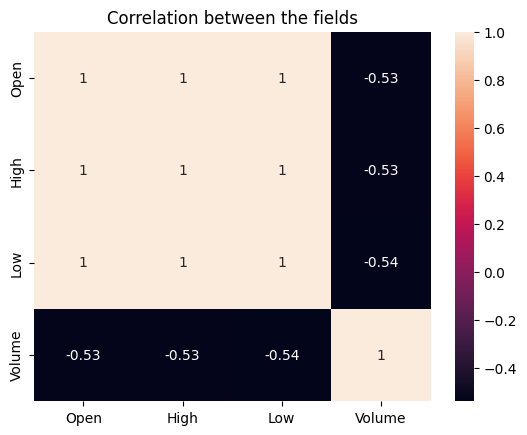

In [37]:
print(googleDatasetTraining.corr())
# Create a correlation heatmap
heatmap = sns.heatmap(googleDatasetTraining.corr(), annot=True)
heatmap.set_title("Correlation between the fields")

- While Date in stock data is very usefull, I couldn't find any direct relation between Date and High.
- I decided to convert date to day of the week and then check it's relevance.

In [38]:
googleDatasetTraining['Weekday'] = googleDatasetTraining['Date'].dt.dayofweek
googleDatasetTraining.head(3)

,Date,Open,High,Low,Volume,Weekday
0,2012-01-03,325.25,332.83,324.97,7380500,1
1,2012-01-04,331.27,333.87,329.08,5749400,2
2,2012-01-05,329.83,330.75,326.89,6590300,3


In [39]:
print(googleDatasetTraining.info())
googleDatasetTraining.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     1258 non-null   datetime64[ns]
 1   Open     1258 non-null   float64       
 2   High     1258 non-null   float64       
 3   Low      1258 non-null   float64       
 4   Volume   1258 non-null   int64         
 5   Weekday  1258 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 59.1 KB
None


,Open,High,Low,Volume,Weekday
count,1258.00,1258.00,1258.00,1258.00,1258.00
mean,533.71,537.88,529.01,3158106.76,2.02
std,151.90,153.01,150.55,2273725.58,1.40
min,279.12,281.21,277.22,7900.00,0.00
25%,404.12,406.76,401.76,1621700.00,1.00
50%,537.47,540.75,532.99,2566150.00,2.00
75%,654.92,662.59,644.80,4122500.00,3.00
max,816.68,816.68,805.14,24977900.00,4.00


In [40]:
googleDatasetTraining['Weekday'].unique()

array([1, 2, 3, 4, 0])

Now that we have weekday we can work with that and try to correlate it with target field.

In [41]:
googleDatasetTraining.corr()

<ipython-input-41-3f7a3c839ebb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  googleDatasetTraining.corr()


,Open,High,Low,Volume,Weekday
Open,1.00,1.00,1.00,-0.53,-0.00
High,1.00,1.00,1.00,-0.53,-0.00
Low,1.00,1.00,1.00,-0.54,-0.00
Volume,-0.53,-0.53,-0.54,1.00,0.11
Weekday,-0.00,-0.00,-0.00,0.11,1.00


In [42]:
!pip install scipy
from scipy.stats import f_oneway
# Perform the ANOVA
F, pvalue = f_oneway(googleDatasetTraining['High'].values, googleDatasetTraining['Weekday'].values)

# Print the ANOVA results
print('F:', F)
print('pvalue:', pvalue)

F: 15428.17688465592
pvalue: 0.0


- A higher F value indicates that the means of the groups are more different.
- A lower pvalue indicates that the null hypothesis is less likely to be true.
- The null hypothesis is a statement that there is no effect, no difference, or no relationship between the variables being studied.

#### Now, I remove all the unneccesary data from training dataset and prepare the testing dataset side wise.

#### Then I will perform model fitting

In [43]:
googleDatasetTraining.head(3)

,Date,Open,High,Low,Volume,Weekday
0,2012-01-03,325.25,332.83,324.97,7380500,1
1,2012-01-04,331.27,333.87,329.08,5749400,2
2,2012-01-05,329.83,330.75,326.89,6590300,3


In [44]:
googleDatasetTraining = googleDatasetTraining.drop('Date', axis=1)
trainingDependentVariable = googleDatasetTraining['High']
trainingIndependentVariables = googleDatasetTraining.drop('High', axis=1)
print(trainingDependentVariable.head(3))
print(trainingIndependentVariables.head(3))

0   332.83
1   333.87
2   330.75
Name: High, dtype: float64
    Open    Low   Volume  Weekday
0 325.25 324.97  7380500        1
1 331.27 329.08  5749400        2
2 329.83 326.89  6590300        3


In [45]:
googleDatasetTesting.head(3)

,Date,Open,High,Low,Volume
0,2012-01-03,325.25,332.83,324.97,7380500
1,2012-01-04,331.27,333.87,329.08,5749400
2,2012-01-05,329.83,330.75,326.89,6590300


In [46]:
googleDatasetTesting['Weekday'] = googleDatasetTesting['Date'].dt.dayofweek
testingDependentVariable = googleDatasetTesting['High']
testingIndependentVariable = googleDatasetTesting.drop(['High','Date'], axis=1)

In [47]:
print(testingDependentVariable.head(3))
print(testingIndependentVariable.head(3))

0   332.83
1   333.87
2   330.75
Name: High, dtype: float64
    Open    Low   Volume  Weekday
0 325.25 324.97  7380500        1
1 331.27 329.08  5749400        2
2 329.83 326.89  6590300        3


### **Model Fitting**

In [48]:
pip install scikit-learn

In [49]:
from sklearn.linear_model import LinearRegression
# Create the linear regression model
model = LinearRegression().fit(trainingIndependentVariables, trainingDependentVariable)

# Print the coefficients of the model
print(model.coef_)
model

[ 6.51564112e-01  3.63728979e-01  6.19545211e-07 -3.37524555e-01]


LinearRegression()

### **Model Prediction**

In [50]:
# Predict the target for the testing dataset
predicted_y = model.predict(testingIndependentVariable)

# Compare the predicted target with the actual target
print(predicted_y, testingDependentVariable.values)

[330.80115406 334.87043136 333.31906359 ... 798.50264526 789.59793707
 786.42263925] [332.83 333.87 330.75 ... 794.23 785.93 782.78]


### **Model Residual Analysis**

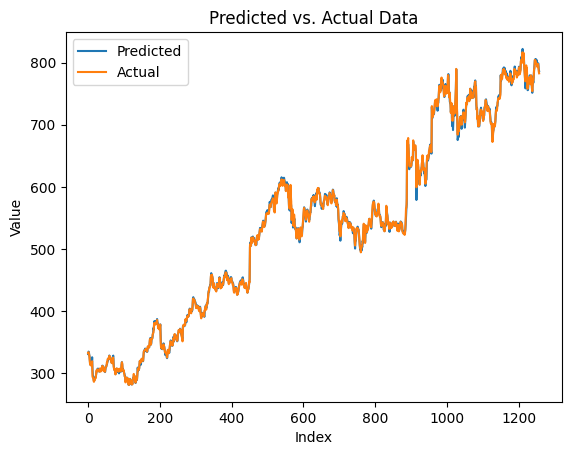

In [51]:
# Plot the predicted data
plt.plot(predicted_y, label="Predicted")

# Plot the actual data
plt.plot(testingDependentVariable.values, label="Actual")

# Add a title and labels to the axes
plt.title("Predicted vs. Actual Data")
plt.xlabel("Index")
plt.ylabel("Value")

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [52]:
import sklearn.metrics as metrics

# Calculate the mean absolute error
mae = metrics.mean_absolute_error(testingDependentVariable, predicted_y)
print("Mean absolute error:", mae)

# Calculate the root mean squared error
rmse = metrics.mean_squared_error(testingDependentVariable, predicted_y)
print("Mean squared error:", rmse)

print(predicted_y)

Mean absolute error: 2.3710512622564672
Mean squared error: 11.053999459674657
[330.80115406 334.87043136 333.31906359 ... 798.50264526 789.59793707
 786.42263925]


In [53]:
# Save the coefficients and intercept
print(model.coef_)
print(model.intercept_)

[ 6.51564112e-01  3.63728979e-01  6.19545211e-07 -3.37524555e-01]
-3.556108268960884


- Mean Square Error (MSE) and Mean Absolute Error (MAE) are two of the most common metrics used to evaluate the accuracy of regression models.
- MSE measures the average squared difference between the predicted and actual values, while MAE measures the average absolute difference between the predicted and actual values.
- Incomparision to big values like 330.80 to 786.422, the MSE and MAE is low to 11.05 and 2.37 which can be reduced, but I would continue to next steps.


### **Saving Model to deploy and reuse**

In [54]:
import pickle


# Writing to sample.json
with open("model.pkl", "wb") as outfile:
    pickle.dump(model, outfile)

In [55]:
with open("model.pkl",'rb') as outfile:
    model1 = pickle.load(outfile)

In [56]:
predicted_y_temp = model1.predict(trainingIndependentVariables)
print(predicted_y_temp)

[330.80115406 334.87043136 333.31906359 ... 798.50264526 789.59793707
 786.42263925]


In [60]:
# Open    Low   Volume  Weekday
for_today = model1.predict([[1034.17,1027.00, 2200000,3]])
print(for_today)

[1044.17203579]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


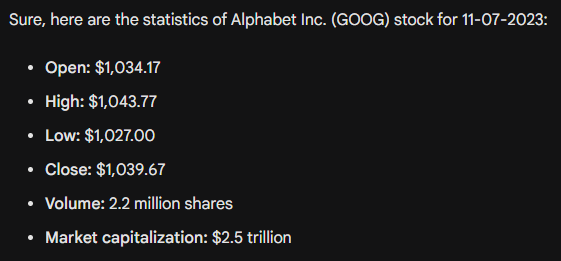